In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('full_data.csv')
df.head()


a = set(df.location)
a = list(a)
print(a)

['Costa Rica', 'Eritrea', 'China', 'Mexico', 'Malaysia', 'Palestine', 'Vatican', 'Paraguay', 'Armenia', 'Moldova', 'India', 'Nicaragua', 'Puerto Rico', 'Thailand', 'Lithuania', 'San Marino', 'Trinidad and Tobago', 'Gabon', 'United Arab Emirates', 'Anguilla', 'Belgium', 'Sierra Leone', 'Swaziland', 'Curacao', 'Turkey', 'Djibouti', 'Northern Mariana Islands', 'Lesotho', 'Saint Lucia', 'Guyana', 'Bolivia', 'French Polynesia', 'Canada', 'Montenegro', 'Sudan', 'Congo', 'Albania', 'Jordan', 'Hungary', 'Vietnam', 'Russia', 'Dominica', 'Nigeria', 'Turks and Caicos Islands', 'Israel', 'Honduras', 'Bosnia and Herzegovina', 'Mozambique', 'Brazil', 'Portugal', 'New Zealand', 'Germany', 'Aruba', 'Uruguay', 'Zimbabwe', 'Gibraltar', 'Monaco', 'Rwanda', 'Mauritania', 'Barbados', 'Angola', 'Liberia', 'Comoros', 'Bonaire Sint Eustatius and Saba', 'Equatorial Guinea', 'Sweden', 'Gambia', 'Zambia', 'Burundi', 'Democratic Republic of Congo', 'Cyprus', 'Jamaica', 'Cambodia', 'Austria', 'Netherlands', 'Slova

In [3]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except KeyError:
        country_continent_name = 'error: '+country_name

    return country_continent_name

# Example
country_name = 'Afghanistan'
print(country_to_continent(country_name))

Asia


In [4]:
df['continent'] = df['location'].apply(lambda x=df['location']: country_to_continent(x))

In [5]:
df.continent.value_counts()

Europe                                    10189
Asia                                       9953
Africa                                     8871
North America                              5850
South America                              2399
Oceania                                    1485
error: World                                247
error: Faeroe Islands                       181
error: Sint Maarten (Dutch part)            179
error: Vatican                              175
error: Democratic Republic of Congo         174
error: Cote d'Ivoire                        173
error: Kosovo                               173
error: Curacao                              169
error: Timor                                165
error: Bonaire Sint Eustatius and Saba      154
error: Western Sahara                       130
error: International                         71
Name: continent, dtype: int64

In [6]:
#df['column name'] = df['column name'].replace(['old value'],'new value')

In [7]:
for error in df['continent']:
    if error == 'error: World':
        df['continent'] = df['continent'].replace([error], 'drop')
    elif error == 'error: International':
        df['continent'] = df['continent'].replace([error], 'drop')
    elif error == 'error: Faeroe Islands' :
        df['continent'] = df['continent'].replace([error], 'Europe')
    elif error == 'error: Sint Maarten (Dutch part)':
        df['continent'] = df['continent'].replace([error], 'Europe')
    elif error == 'error: Vatican':
        df['continent'] = df['continent'].replace([error], 'Europe')
    elif error == 'error: Democratic Republic of Congo':
        df['continent'] = df['continent'].replace([error], 'Africa')
    elif error == 'error: Kosovo':
        df['continent'] = df['continent'].replace([error], 'Europe')
    elif error == "error: Cote d'Ivoire":
        df['continent'] = df['continent'].replace([error], 'Africa')
    elif error == 'error: Curacao':
        df['continent'] = df['continent'].replace([error], 'South America')
    elif error == 'error: Timor':
        df['continent'] = df['continent'].replace([error], 'Asia')
    elif error == 'error: Bonaire Sint Eustatius and Saba':
        df['continent'] = df['continent'].replace([error], 'North America')
    elif error == 'error: Western Sahara':
        df['continent'] = df['continent'].replace([error], 'Africa')
    
df = df[df['continent'] != 'drop'] 

In [8]:
df.continent.value_counts()

Europe           10897
Asia             10118
Africa            9348
North America     6004
South America     2568
Oceania           1485
Name: continent, dtype: int64

In [9]:
df = df[df['continent'] != 'drop'] 
# df.drop(index='drop')
# df = df.loc(df['continent']!='drop')
df.continent.value_counts()

Europe           10897
Asia             10118
Africa            9348
North America     6004
South America     2568
Oceania           1485
Name: continent, dtype: int64

In [10]:
def error_fix(error):
    if error == 'error: World':
        return 'drop'
    if error == 'error: International':
        return 'drop'
    if error == 'error: Faeroe Island' :
        return 'Europe'
    if error == 'error: Sint Maarten (Dutch part)':
        return 'Europe'
    if error == 'error: Vatican':
        return 'Europe'
    if error == 'error: Democratic Republic of Congo':
        return 'Africa'
    if error == 'error: Kosovo':
        return 'Europe'
    if error == "error: Cote d'Ivoire":
        return 'Africa'
    if error == 'error: Curacao':
        return 'South America'
    if error == 'error: Timor':
        return 'Asia'
    if error == 'error: Bonaire Sint Eustatius and Saba':
        return 'North America'
    if error == 'error: Western Sahara':
        return 'Africa'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = approval_df.groupby('week_bins')['approve'].mean().index
y1 = approval_df.groupby('week_bins')['approve'].mean()
y2 = stimuluscheck_df.groupby('week_bins')['text'].count().values
#y3 = arr1200

fig, ax1 = plt.subplots(figsize=(15,8))

ax1.set_title('Trumps Approval Rating vs. Number of Tweets about Stimulus Checks', fontsize=15)
ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#duplicate ax1
ax2 = ax1.twinx()

#ax1 will plot Trump's approval rating, ax2 will plot number of tweets
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
#ax2.plot(x, y3, 'r-')

# set legends
ax1.legend(["Trump's Approval Rating"], fontsize=12,loc=4)
ax2.legend(["Number of Tweets about Stimulus Checks"], fontsize=12, loc=2)
#ax2.legend(bbox_to_anchor=(0.04, 0.82, 1., .102),labelspacing=0.1,
            #handlelength=0.1, handletextpad=0.1,frameon=False, ncol=4, columnspacing=0.7)


ax1.set_xlabel('Week of Year')
ax1.set_ylabel("Trump's Approval Rating", color='g')
ax2.set_ylabel("Number of tweets", color='b')
              
# plt.text(6.4,3.3,"""Note on our visualization: We made it so that when there is a
#          null value we replace it with the rank 15 so if an artist is not 
#          on that platform's top 10 they go to the bottom""", fontsize = 10)
plt.text(14,200, """Weeks 15 and 16: 
Talks of reopening the US""", fontsize = 12)

plt.annotate("""Week 12 - 6.6 Million people file for unemployment, 
stay at home orders announced""",
             xy = (12,15), xytext = (2,15), textcoords = ('figure points'),
             arrowprops=dict(facecolor='black'), fontsize = 14)

plt.text(12,-200, """End of week 12: 
Trump signs stimulus check bill""", fontsize = 12)




plt.show()

# print('notable dates:')
# print('Week 12 - 6.6 Million people file for unemployment')


NameError: name 'approval_df' is not defined

In [11]:
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(by=['date'])

In [12]:
df['week_bins'] = df.date.dt.week
df['month_bins'] = df.date.dt.month

In [13]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,continent,week_bins,month_bins
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Asia,1,12
35222,2019-12-31,Sweden,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Europe,1,12
16829,2019-12-31,Iceland,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Europe,1,12
17076,2019-12-31,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Asia,1,12
17323,2019-12-31,Indonesia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Asia,1,12


In [35]:
def fix_2019(date):
    date = str(date)
    if date in "2019":
        return 0
    else:
        pass

In [ ]:
df.apply(lambda x=date: fix_2019(x))

In [30]:
df[['date', 'month_bins']]

,date,month_bins
0,2019-12-31,12
21952,2019-12-31,12
22199,2019-12-31,12
22446,2019-12-31,12
23012,2019-12-31,12
24116,2019-12-31,12
24540,2019-12-31,12
25976,2019-12-31,12
26223,2019-12-31,12
26636,2019-12-31,12


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "month_bins", data = df)
ax.set(title = "New COVID19 cases by month", xlabel = "Month", ylabel = "Number of Cases")
plt.text(10,10,"""Month 12 is from December 2019""", fontsize = 20)

Text(10, 10, 'Month 12 is from December 2019')

In [ ]:
plt.figure(figsize=(15, 10)) # set size of barplot
ax = sns.barplot(x='Artist', y='Rank', data=spotify_top_10) # barplot w/ artist and rank
plt.title('Top 10 Spotify Artists as of 4/24')
plt.xlabel('Artist')
plt.ylabel('Spotify Rank')

In [ ]:

f,ax=plt.subplots(1,2,figsize=(20,15))
sns.barplot('Our_Rank','Artist',data=us_vs_apple.sort_values('Our_Position'),orient='h',ax=ax[0])
ax[0].set_title('Our top 10 (Apple Artists)')
ax[0].set_yticks(range(0,10))
ax[0].set_ylabel("Artist")
ax[0].set_xlabel("Our Rank")
plt.gca().invert_xaxis()
#ax[0].barh('Our_Rank', 10)


### Complete code here to explore Sex and Age vs Survived
sns.barplot('Rank','Artist',data=us_vs_apple.sort_values('Position'),orient='h',ax=ax[1])
ax[1].set_title("Apple's top 10")
ax[1].set_yticks(range(0,10))
ax[1].set_ylabel("Artist")
ax[1].set_xlabel("Apple Music's Rank")
plt.gca().invert_xaxis()
plt.show()

In [ ]:
final_ranking.replace(to_replace = "YoungBoy Never Broke Again", value = "Young Boy")
Spotify12 = final_ranking["Spotify_Position"]
rank = np.arange(0,11)
Singers = final_ranking["Artist"]
Singers.replace(to_replace = "YoungBoy Never Broke Again", value = "Young Boy", inplace = True)
Our_rank = final_ranking["Our_Position"]
Spotify = final_ranking["Spotify_Position"]
Apple = final_ranking["Apple_Position"]
Apple = Apple.fillna(15)
Spotify = Spotify.fillna(15)
plt.figure(figsize=[30,10])
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.plot(Singers, Our_rank, label = "Our Chart")
plt.plot(Singers, Spotify, label = "Spotify")
plt.plot(Singers, Apple, label = "Apple Music")
plt.legend(loc = "lower left", shadow = True, prop = {"size": 28})
plt.xlabel("Artist", fontsize = 35)
plt.ylabel("Artist Rank", fontsize = 35)
plt.suptitle("Our List Compared to Streaming Platforms", fontsize = 30)
plt.gca().invert_yaxis()
plt.text(6.4,3.3,"""Note on our visualization: We made it so that when there is a
         null value we replace it with the rank 15 so if an artist is not 
         on that platform's top 10 they go to the bottom""", fontsize = 20)
plt.text(1.8,12.9, """The reason why there are 13 artists,\n is because there were some artists that\n were not on both Apple, and Spotify's
         lists""", fontsize = 15)

[Text(0, 0, 'Asia'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Oceania'),
 Text(0, 0, 'Africa'),
 Text(0, 0, 'South America')]

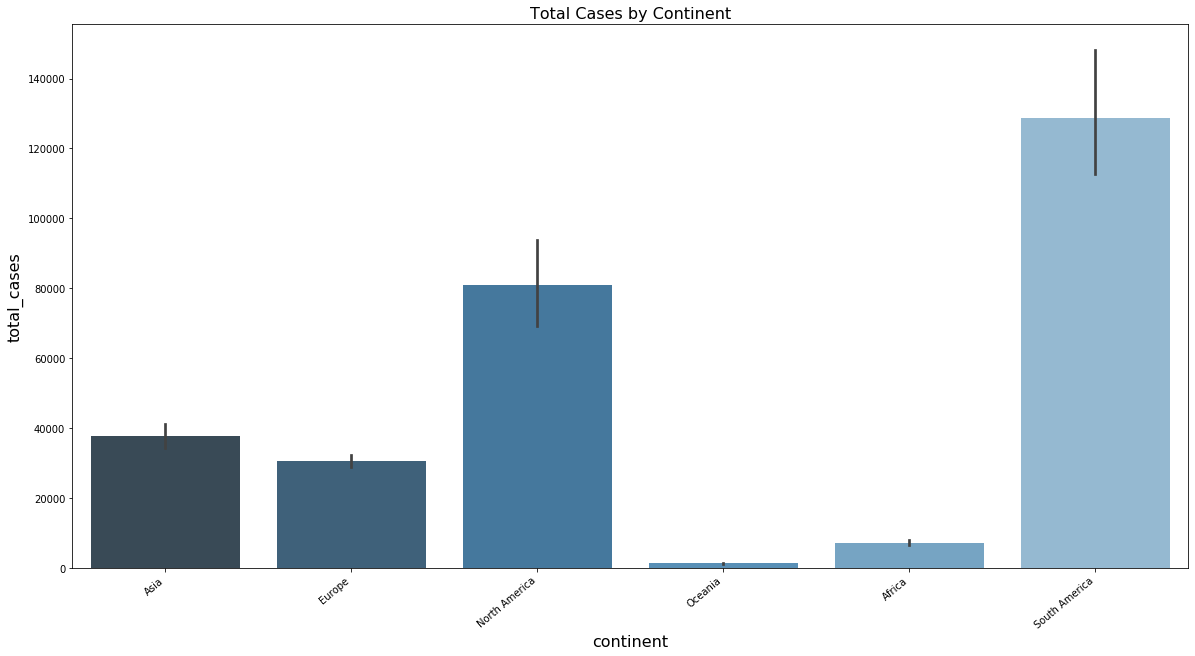

In [27]:
import seaborn as sns

plt.figure(figsize= (20,10))
plt.title("Total Cases by Continent", size = 16)
plt.xlabel("Continent", size = 16)
plt.ylabel("Total Cases", size = 16)

ax = sns.barplot(x="continent", y="total_cases", data=df, palette="Blues_d")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


In [ ]:
df["beginning"] = tips["month"].isin(["03", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)